# CSC494 - Final Project
## American Sign Language Recognizer

# Dataset

In [1]:
import os
import numpy as np
import pandas as pd

dataset_dir = f'{os.getcwd()}/../dataset'
path_to_training = f'{dataset_dir}/asl_alphabet_train/asl_alphabet_train/'
path_to_testing = f'{dataset_dir}/asl_alphabet_test/asl_alphabet_test/' # Lets use this for blind testing (i.e. the images were not used to validate during the training process)

f'[Path to training exists >> {os.path.exists(path_to_training)}]' \
f'[Path to testing exists >> {os.path.exists(path_to_testing)}]'

'[Path to training exists >> True][Path to testing exists >> True]'

In [2]:
categories = [f.name for f in os.scandir(path_to_training)]
categories

['D',
 'O',
 'M',
 'K',
 'Q',
 'Y',
 'J',
 'space',
 'I',
 'A',
 'S',
 'nothing',
 'L',
 'C',
 'U',
 'N',
 'W',
 'B',
 'H',
 'V',
 'F',
 'Z',
 'del',
 'T',
 'X',
 'R',
 'G',
 'E',
 'P']

2022-05-06 09:39:23.562005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-06 09:39:23.562025: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


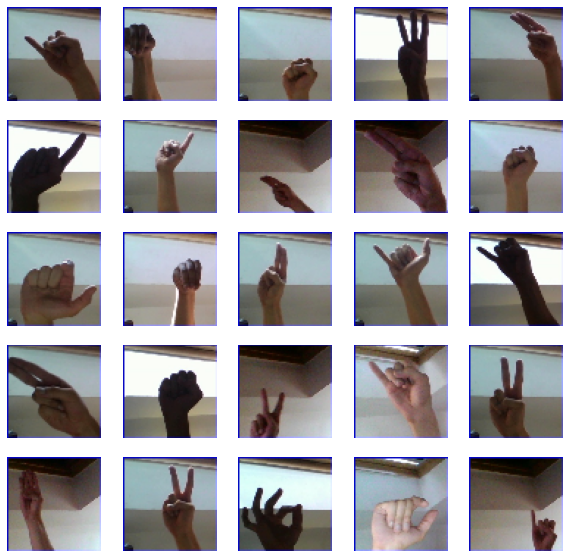

In [3]:
from image_cnn import ASLClassifier
number_of_threads = 2
asl_clf = ASLClassifier(number_of_threads)
asl_clf.load_dataset(path_to_training, img_shape=(64, 64, 3))
asl_clf.display_25_img()

In [4]:
asl_clf.train_set.classes

array([ 0,  0,  0, ..., 28, 28, 28], dtype=int32)

In [5]:
asl_clf.compile_model()

2022-05-06 09:39:29.545258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-06 09:39:29.545276: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-06 09:39:29.545292: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (levi-Q525UAR): /proc/driver/nvidia/version does not exist
2022-05-06 09:39:29.545631: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
asl_clf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                        

In [7]:
print(asl_clf.train_set)
print(asl_clf.test_set)

In [8]:
asl_history = asl_clf.train(epochs=10)

Epoch 1/10
  35/1904 [..............................] - ETA: 10:59 - loss: 3.3710 - accuracy: 0.0348

KeyboardInterrupt: 

In [ ]:
hist_metrics = pd.DataFrame(asl_history)
hist_metrics[['val_loss', 'val_accuracy']].plot()

In [ ]:
prediction = asl_clf.model.predict(asl_clf.test_set)

In [ ]:
prediction

In [ ]:
asl_clf.test_set.classes

In [ ]:
pred_classes = []

In [ ]:
asl_pred = np.argmax(prediction, axis=1)
asl_pred

In [ ]:
asl_clf.performance_report(asl_pred)

In [ ]:
asl_clf.model.save('asl_clf_64x64_10e_v2.h5')